In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
mushroom = pd.read_csv("mushrooms.csv")

In [3]:
column_list = list(mushroom.columns)

In [4]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Data cleaning
print("Data before cleaning :",len(mushroom))
for column_i in column_list:
    mushroom = mushroom.drop(mushroom.index[mushroom[column_i].isin(['?'])])
print("Data after cleaning :",len(mushroom))

Data before cleaning : 8124
Data after cleaning : 5644


In [6]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,...,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,2,6,4,8,2,7,2,2,2,9,...,4,7,7,1,2,3,4,6,6,6
top,e,x,y,g,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,v,d
freq,3488,2840,2220,1696,3184,2776,5626,4620,4940,1384,...,3544,3136,3088,5644,5636,5488,3488,1920,2160,2492


In [7]:
unique_val = {}
for x in mushroom.columns:
    unique_val[x] = np.unique(mushroom[x])

In [8]:
from sklearn import preprocessing

In [9]:
dis = preprocessing.LabelEncoder()
for x in mushroom.columns:
    dis.fit(unique_val[x])
    mushroom[x] = dis.transform(mushroom[x])

In [10]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1


In [11]:
Y = mushroom['class']
X = mushroom.loc[:, mushroom.columns != 'class']

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

In [13]:
print(scaled_X)

[[ 0.95193532  0.27895188 -0.14846445 ... -0.20344067 -0.53662286
   2.35567928]
 [ 0.95193532  0.27895188  1.48387322 ...  0.7408185  -1.28928177
  -0.14770122]
 [-2.06103179  0.27895188  0.93976067 ...  0.7408185  -1.28928177
   1.10398903]
 ...
 [ 0.95193532  1.02724296 -0.692577   ...  3.573596    0.96869495
   1.72983415]
 [ 0.95193532  1.02724296 -1.78080212 ...  3.573596   -2.04194068
  -0.77354635]
 [-0.85584494  1.02724296 -1.78080212 ...  3.573596   -2.04194068
  -0.77354635]]


In [14]:
x2 = scaled_X[1:]
gradient_X = x2 - scaled_X[:-1]
gradient_Y = Y[:-1]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [16]:
names = ['MLP Classifier', 'Linear SVM', 'QDA', 'RBF SVM']
classifiers = [
    MLPClassifier(alpha=1),
    SVC(kernel="linear", C=0.025),
    QuadraticDiscriminantAnalysis(),
    SVC(gamma=2, C=1)
]

In [17]:
normal_mushroom_result = {}
gradient_mushroom_result = {}

In [18]:
for name, clf in zip(names, classifiers):
    normal_mushroom_result[name] = cross_val_score(clf, scaled_X, Y, cv = 4)
    gradient_mushroom_result[name] = cross_val_score(clf, gradient_X, gradient_Y, cv = 4)

In [33]:
import matplotlib.patches as mpatches
def plot(result, title):
    params = ['k', 'r', 'm', 'yellow']
    patch = []
    for x, param in zip(result.keys(), params):
        plt.plot(range(0, 4), result[x], param, label=x)
        patch.append(mpatches.Patch(color=param, label=x))
        plt.legend(handles=patch)#, bbox_to_anchor=(0.5, 0.5), loc='bottom', ncol=2 )
    plt.title(title)
    plt.xlabel('Cross Validation score')
    plt.ylabel('Accuracy')
    plt.show()


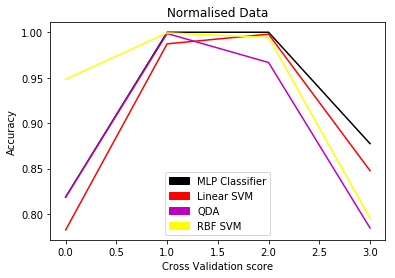

In [34]:
plot(normal_mushroom_result, 'Normalised Data')

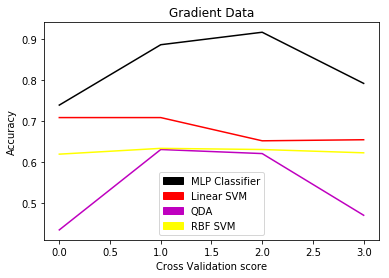

In [35]:
plot(gradient_mushroom_result, 'Gradient Data')